In [1]:
# HIDDEN

from datascience import *
path_data = '../../../data/'
import numpy as np

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

### Cross-Classifying by More than One Variable ###

When individuals have multiple features, there are many different ways to classify them. For example, if we have a population of college students for each of whom we have recorded a major and the number of years in college, then the students could be classified by major, or by year, or by a combination of major and year.

The `group` method also allows us to classify individuals according to multiple variables. This is called *cross-classifying*.

### Two Variables: Counting the Number in Each Paired Category ###
The table `more_cones` records the flavor, color, and price of six ice cream cones.

In [2]:
more_cones = Table().with_columns(
    'Flavor', make_array('strawberry', 'chocolate', 'chocolate', 'strawberry', 'chocolate', 'bubblegum'),
    'Color', make_array('pink', 'light brown', 'dark brown', 'pink', 'dark brown', 'pink'),
    'Price', make_array(3.55, 4.75, 5.25, 5.25, 5.25, 4.75)
)

more_cones

Flavor,Color,Price
strawberry,pink,3.55
chocolate,light brown,4.75
chocolate,dark brown,5.25
strawberry,pink,5.25
chocolate,dark brown,5.25
bubblegum,pink,4.75


We know how to use `group` to count the number of cones of each flavor:

In [3]:
more_cones.group('Flavor')

Flavor,count
bubblegum,1
chocolate,3
strawberry,2


But now each cone has a color as well. To classify the cones by both flavor and color, we will pass a list of labels as an argument to `group`. The resulting table has one row for every *unique combination* of values that appear together in the grouped columns. As before, a single argument (a list, in this case, but an array would work too) gives row counts.

Although there are six cones, there are only four unique combinations of flavor and color. Two of the cones were dark brown chocolate, and two pink strawberry.

In [4]:
more_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


### Two Variables: Finding a Characteristic of Each Paired Category ###
A second argument aggregates all other columns that are not in the list of grouped columns.

In [5]:
more_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


**Three or More Variables.** You can use `group` to classify rows by three or more categorical variables. Just include them all in the list that is the first argument. But cross-classifying by multiple variables can become complex, as the number of distinct combinations of categories can be quite large. 

### Pivot Tables: Rearranging the Output of `group` ###
Many uses of cross-classification involve just two categorical variables, like `Flavor` and `Color` in the example above. In these cases it is possible to display the results of the classification in a different kind of table, called a *pivot table*. Pivot tables, also known as *contingency tables*, make it easier to work with data that have been classified according to two variables.

Recall the use of `group` to count the number of cones in each paired category of flavor and color:

In [6]:
more_cones.group(['Flavor', 'Color'])

Flavor,Color,count
bubblegum,pink,1
chocolate,dark brown,2
chocolate,light brown,1
strawberry,pink,2


The same data can be displayed differenly using the Table method `pivot`. Ignore the code for a moment, and just examine the table of outcomes.

In [7]:
more_cones.pivot('Flavor', 'Color')

Color,bubblegum,chocolate,strawberry
dark brown,0,2,0
light brown,0,1,0
pink,1,0,2


Notice how this table displays all nine possible pairs of flavor and color, including pairs like "dark brown bubblegum" that don't exist in our data. Notice also that the count in each pair appears in the body of the table: to find the number of light brown chocolate cones, run your eye along the row `light brown` until it meets the column `chocolate`.

The `group` method takes a list of two labels because it is flexible: it could take one or three or more. On the other hand, `pivot` always takes two column labels, one to determine the columns and one to determine the rows.

**`pivot`** 

The `pivot` method is closely related to the `group` method: it groups together rows that share a combination of values. It differs from `group` because it organizes the resulting values in a grid. The first argument to `pivot` is the label of a column that contains the values that will be used to form new columns in the result. The second argument is the label of a column used for the rows. The result gives the count of all rows of the original table that share the combination of column and row values.

Like `group`, `pivot` can be used with additional arguments to find characteristics of each paired category. An optional third argument called `values` indicates a column of values that will replace the counts in each cell of the grid. All of these values will not be displayed, however; the fourth argument `collect` indicates how to collect them all into one aggregated value to be displayed in the cell.

An example will help clarify this. Here is `pivot` being used to find the total price of the cones in each cell.  

In [8]:
more_cones.pivot('Flavor', 'Color', values='Price', collect=sum)

Color,bubblegum,chocolate,strawberry
dark brown,0,10.5,0
light brown,0,4.75,0
pink,4.75,0,8.8


And here is `group` doing the same thing.

In [9]:
more_cones.group(['Flavor', 'Color'], sum)

Flavor,Color,Price sum
bubblegum,pink,4.75
chocolate,dark brown,10.5
chocolate,light brown,4.75
strawberry,pink,8.8


Though the numbers in both tables are the same, table produced by `pivot` is easier to read and lends itself more easily to analysis. The advantage of `pivot` is that it places grouped values into adjacent columns, so that they can be combined and compared.

### Example: Education and Income of Californian Adults ###
The State of California's Open Data Portal is a rich source of information about the lives of Californians. It is our source of a [dataset](http://data.ca.gov/dataset/ca-educational-attainment-personal-income) on educational attainment and personal income among Californians over the years 2008 to 2014. The data are derived from the U.S. Census Current Population Survey.

For each year, the table records the `Population Count` of Californians in many different combinations of age, gender, educational attainment, and personal income. We will study only the data for the year 2014.

In [11]:
full_table = Table.read_table('https://umass-data-science.github.io/CS108website/notebooks/educ_inc.csv')
ca_2014 = full_table.where('Year', are.equal_to('1/1/14 0:00')).where('Age', are.not_equal_to('00 to 17'))
ca_2014

Year,Age,Gender,Educational Attainment,Personal Income,Population Count
1/1/14 0:00,18 to 64,Female,No high school diploma,"H: 75,000 and over",2058
1/1/14 0:00,65 to 80+,Male,No high school diploma,"H: 75,000 and over",2153
1/1/14 0:00,65 to 80+,Female,No high school diploma,"G: 50,000 to 74,999",4666
1/1/14 0:00,65 to 80+,Female,High school or equivalent,"H: 75,000 and over",7122
1/1/14 0:00,65 to 80+,Female,No high school diploma,"F: 35,000 to 49,999",7261
1/1/14 0:00,65 to 80+,Male,No high school diploma,"G: 50,000 to 74,999",8569
1/1/14 0:00,18 to 64,Female,No high school diploma,"G: 50,000 to 74,999",14635
1/1/14 0:00,65 to 80+,Male,No high school diploma,"F: 35,000 to 49,999",15212
1/1/14 0:00,65 to 80+,Male,"College, less than 4-yr degree","B: 5,000 to 9,999",15423
1/1/14 0:00,65 to 80+,Female,Bachelor's degree or higher,"A: 0 to 4,999",15459


Each row of the table corresponds to a combination of age, gender, educational level, and income. There are 127 such combinations in all! 

As a first step it is a good idea to start with just one or two variables. We will focus on just one pair: educational attainment and personal income. 

In [12]:
educ_inc = ca_2014.select('Educational Attainment', 'Personal Income', 'Population Count')
educ_inc

Educational Attainment,Personal Income,Population Count
No high school diploma,"H: 75,000 and over",2058
No high school diploma,"H: 75,000 and over",2153
No high school diploma,"G: 50,000 to 74,999",4666
High school or equivalent,"H: 75,000 and over",7122
No high school diploma,"F: 35,000 to 49,999",7261
No high school diploma,"G: 50,000 to 74,999",8569
No high school diploma,"G: 50,000 to 74,999",14635
No high school diploma,"F: 35,000 to 49,999",15212
"College, less than 4-yr degree","B: 5,000 to 9,999",15423
Bachelor's degree or higher,"A: 0 to 4,999",15459


Let's start by looking at educational level alone. The categories of this variable have been subdivided by the different levels of income. So we will group the table by `Educational Attainment` and `sum` the `Population Count` in each category.

In [13]:
education = educ_inc.select('Educational Attainment', 'Population Count')
educ_totals = education.group('Educational Attainment', sum)
educ_totals

Educational Attainment,Population Count sum
Bachelor's degree or higher,8525698
"College, less than 4-yr degree",7775497
High school or equivalent,6294141
No high school diploma,4258277


There are only four categories of educational attainment. The counts are so large that is is more helpful to look at percents. For this, we will use the function `percents` that we defined in an earlier section. It converts an array of numbers to an array of percents out of the total in the input array.

In [14]:
def percents(array_x):
    return np.round( (array_x/sum(array_x))*100, 2)

We now have the distribution of educational attainment among adult Californians. More than 30% have a Bachelor's degree or higher, while almost 16% lack a high school diploma.

In [15]:
educ_distribution = educ_totals.with_column(
    'Population Percent', percents(educ_totals.column(1))
)
educ_distribution

Educational Attainment,Population Count sum,Population Percent
Bachelor's degree or higher,8525698,31.75
"College, less than 4-yr degree",7775497,28.96
High school or equivalent,6294141,23.44
No high school diploma,4258277,15.86


By using `pivot`, we can get a contingency table (a table of counts) of adult Californians cross-classified by `Educational Attainment` and `Personal Income`.

In [16]:
totals = educ_inc.pivot('Educational Attainment', 'Personal Income', values='Population Count', collect=sum)
totals

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",575491,985011,1161873,1204529
"B: 5,000 to 9,999",326020,810641,626499,597039
"C: 10,000 to 14,999",452449,798596,692661,664607
"D: 15,000 to 24,999",773684,1345257,1252377,875498
"E: 25,000 to 34,999",693884,1091642,929218,464564
"F: 35,000 to 49,999",1122791,1112421,782804,260579
"G: 50,000 to 74,999",1594681,883826,525517,132516
"H: 75,000 and over",2986698,748103,323192,58945


Here you see the power of `pivot` over other cross-classification methods. Each column of counts is a distribution of personal income at a specific level of educational attainment. Converting the counts to percents allows us to compare the four distributions.

In [17]:
distributions = totals.select(0).with_columns(
    "Bachelor's degree or higher", percents(totals.column(1)),
    'College, less than 4-yr degree', percents(totals.column(2)),
    'High school or equivalent', percents(totals.column(3)),
    'No high school diploma', percents(totals.column(4))   
    )

distributions

Personal Income,Bachelor's degree or higher,"College, less than 4-yr degree",High school or equivalent,No high school diploma
"A: 0 to 4,999",6.75,12.67,18.46,28.29
"B: 5,000 to 9,999",3.82,10.43,9.95,14.02
"C: 10,000 to 14,999",5.31,10.27,11,15.61
"D: 15,000 to 24,999",9.07,17.3,19.9,20.56
"E: 25,000 to 34,999",8.14,14.04,14.76,10.91
"F: 35,000 to 49,999",13.17,14.31,12.44,6.12
"G: 50,000 to 74,999",18.7,11.37,8.35,3.11
"H: 75,000 and over",35.03,9.62,5.13,1.38


At a glance, you can see that over 35% of those with Bachelor's degrees or higher had incomes of $\$75,000$ and over, whereas fewer than 10% of the people in the other education categories had that level of income. 

The bar chart below compares the personal income distributions of adult Californians who have no high diploma with those who have completed a Bachelor's degree or higher. The difference in the distributions is striking. There is a clear positive association between educational attainment and personal income.

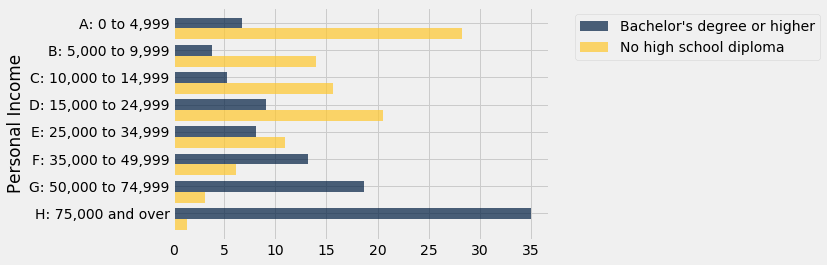

In [18]:
distributions.select(0, 1, 4).barh(0)